# Correlation


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import seaborn.objects as so

## Regression Plot


In [2]:
mpg = pd.read_csv("data/mpg.csv")
mpg.head()


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


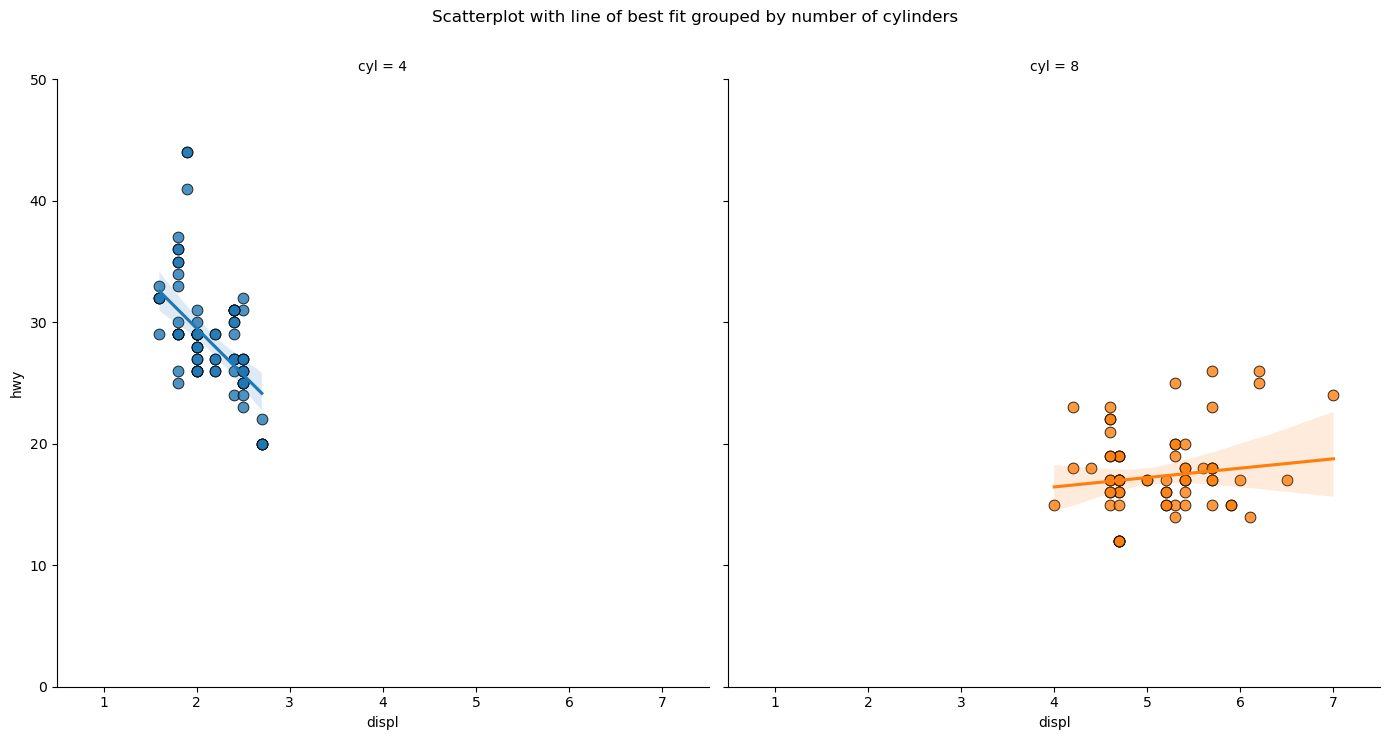

In [3]:
mpg_select = mpg.query("cyl in [4, 8]")

ax = sns.lmplot(
    x="displ",
    y="hwy",
    data=mpg_select,
    height=7,
    robust=True,
    hue="cyl",
    col="cyl",
    scatter_kws=dict(s=60, lw=0.7, edgecolors="black"),
)

ax.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.suptitle(
    t="Scatterplot with line of best fit grouped by number of cylinders", y=1.05
)
plt.show()


### Object Interface

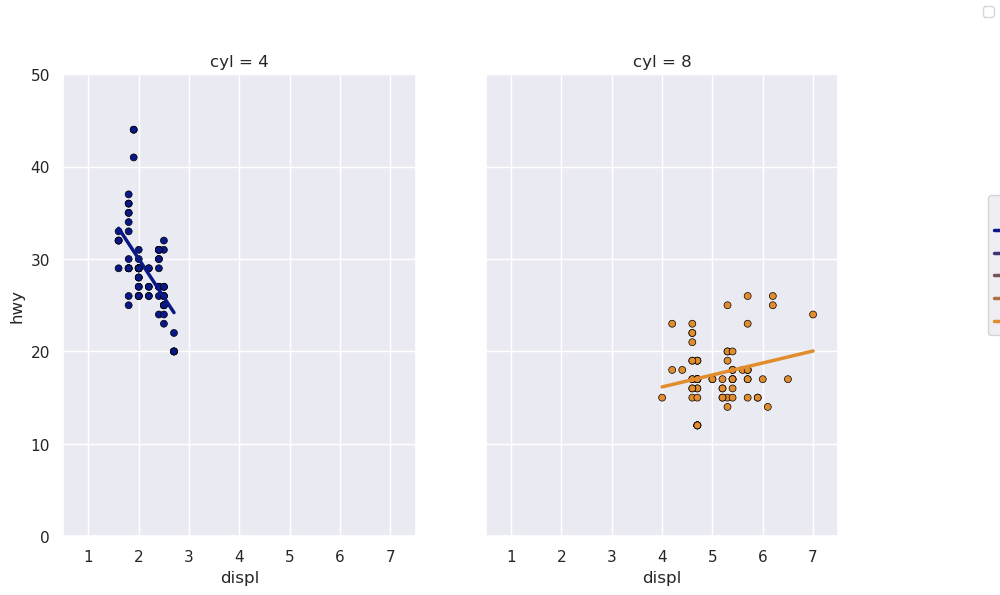

In [4]:
mpg_select = mpg.query("cyl in [4, 8]")

p = (
    so.Plot(data=mpg_select, x="displ", y="hwy", color="cyl")
    .facet("cyl")
    .add(so.Dot(pointsize=5, edgecolor="black"))
    .add(so.Line(linewidth=2.5), so.PolyFit(order=1))
    .on(f := plt.figure(figsize=(10, 6)))
    .limit(x=(0.5, 7.5), y=(0, 50))
    .label(x="displ", title="cyl = {}".format)
    .scale(color=("#091886", "#e18d2d"), x=so.Continuous().tick(every=1))
).plot()

ax = f.axes[0]
f.legend([])

## Jittering


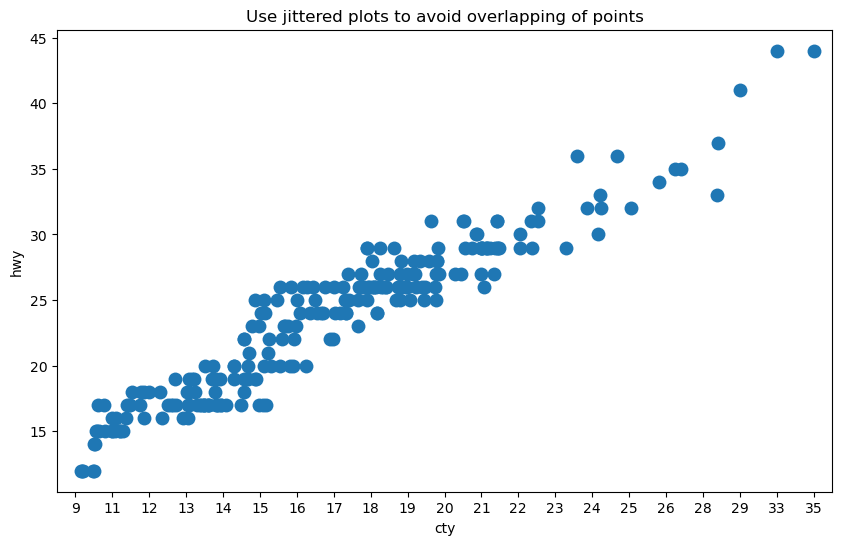

In [5]:
_, ax = plt.subplots(figsize=(10, 6))

sns.stripplot(x="cty", y="hwy", data=mpg, jitter=0.5, size=10, ax=ax)

ax.set(title="Use jittered plots to avoid overlapping of points")
plt.show()


### Object Interface

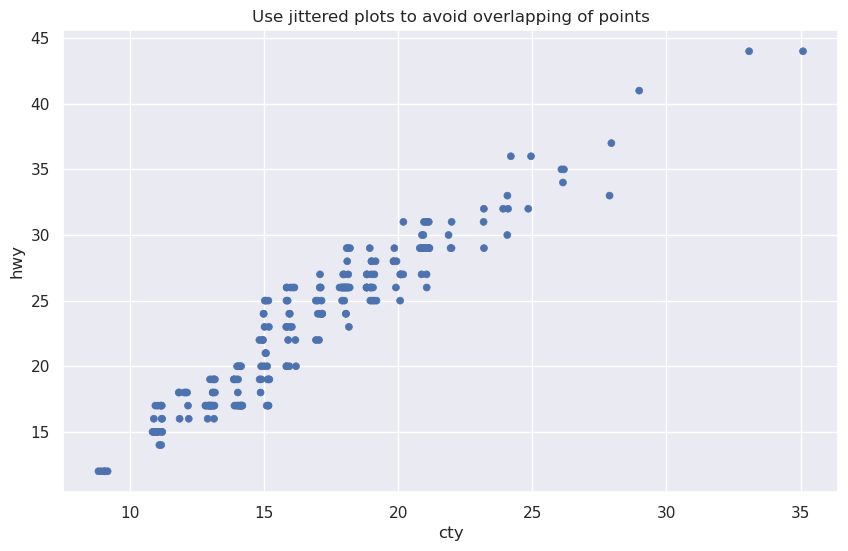

In [6]:
p = (
    so.Plot(data=mpg, x="cty", y="hwy")
    .add(so.Dot(pointsize=5), so.Jitter(width=0.5))
    .on(f := plt.figure(figsize=(10, 6)))
    .label(title="Use jittered plots to avoid overlapping of points")
).plot()


## Marginal Plot


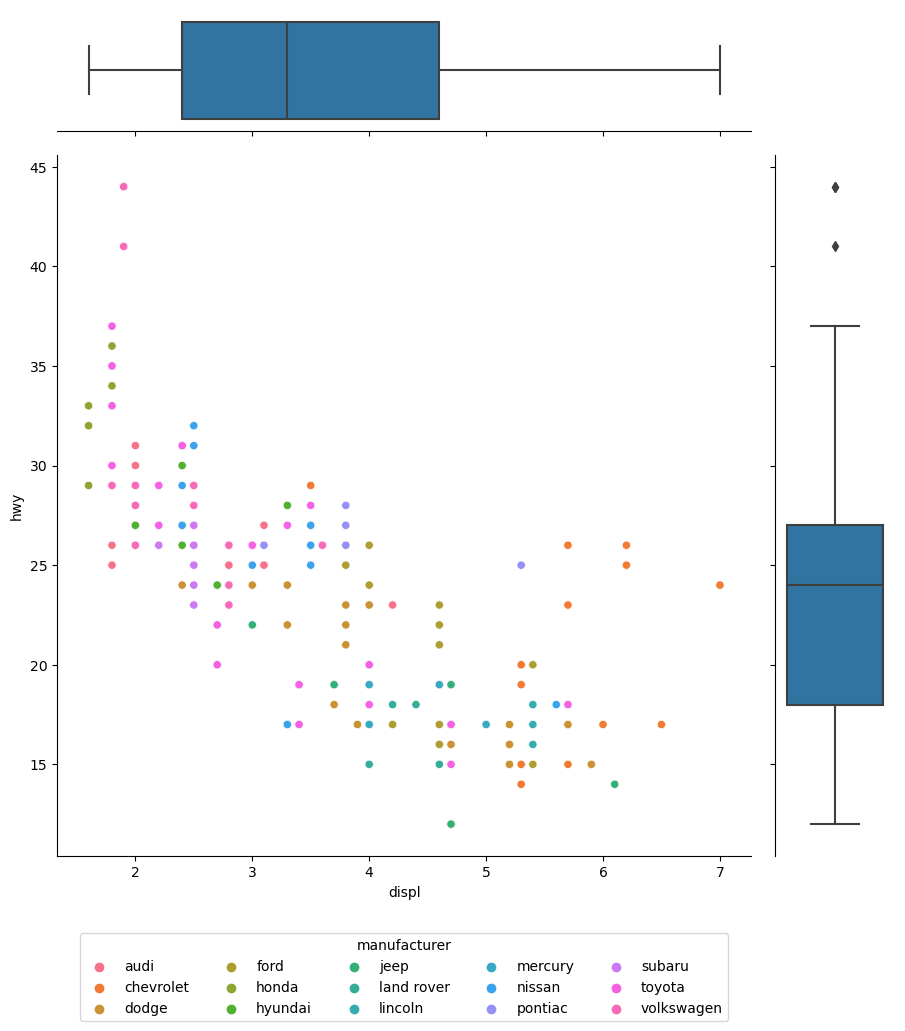

In [7]:
g = sns.JointGrid(height=9)
sns.scatterplot(data=mpg, x="displ", y="hwy", hue="manufacturer", ax=g.ax_joint)
h, l = g.ax_joint.get_legend_handles_labels()
g.ax_joint.legend_.remove()
g.ax_joint.legend(
    h, l, title="manufacturer", loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=5
)

sns.boxplot(data=mpg, x="displ", ax=g.ax_marg_x)
sns.boxplot(data=mpg, y="hwy", ax=g.ax_marg_y)
plt.show()


## FacetGrid


In [8]:
mtcars = pd.read_csv("data/mtcars.csv")
mtcars.head()


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars
0,4.582576,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1,Mazda RX4
1,4.582576,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1,Mazda RX4 Wag
2,4.774935,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1,Datsun 710
3,4.626013,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1,Hornet 4 Drive
4,4.324350,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1,Hornet Sportabout


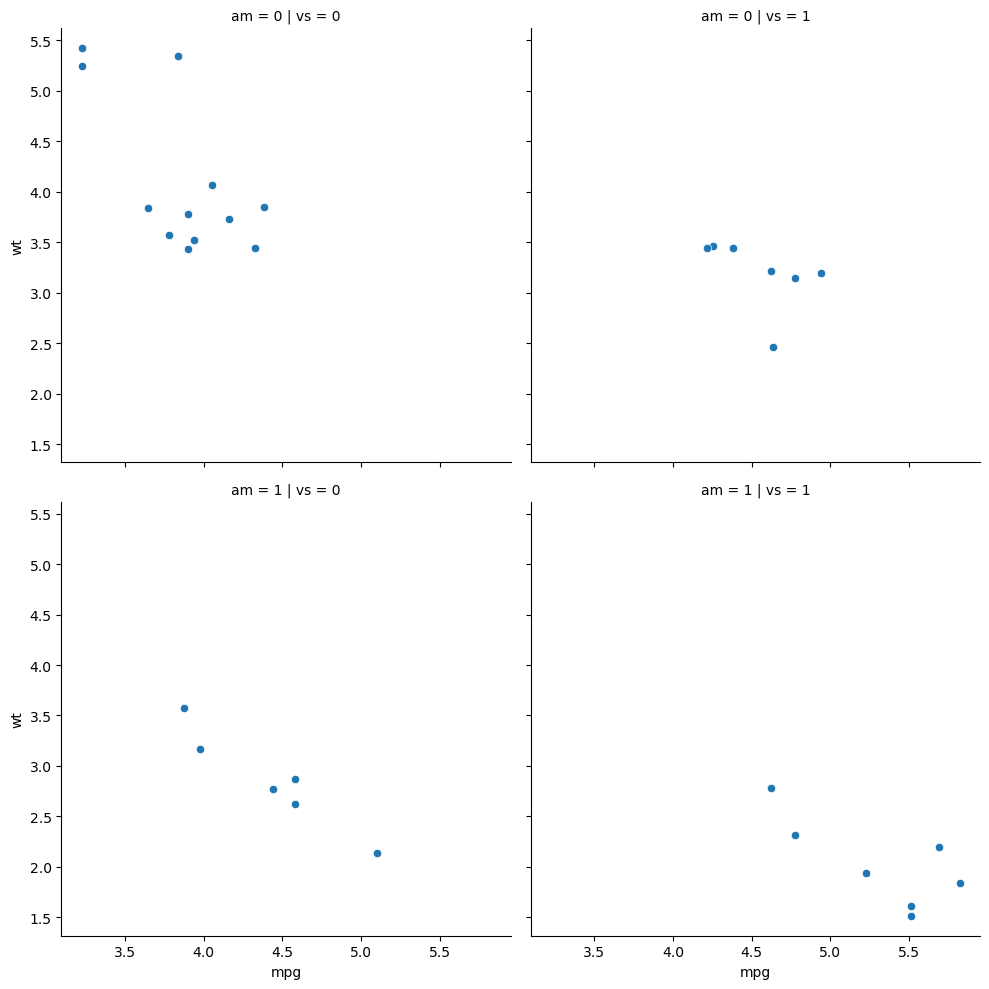

In [9]:
g = sns.FacetGrid(mtcars, col="vs", row="am", height=5)
g.map(sns.scatterplot, "mpg", "wt")
plt.show()


### Object Interface

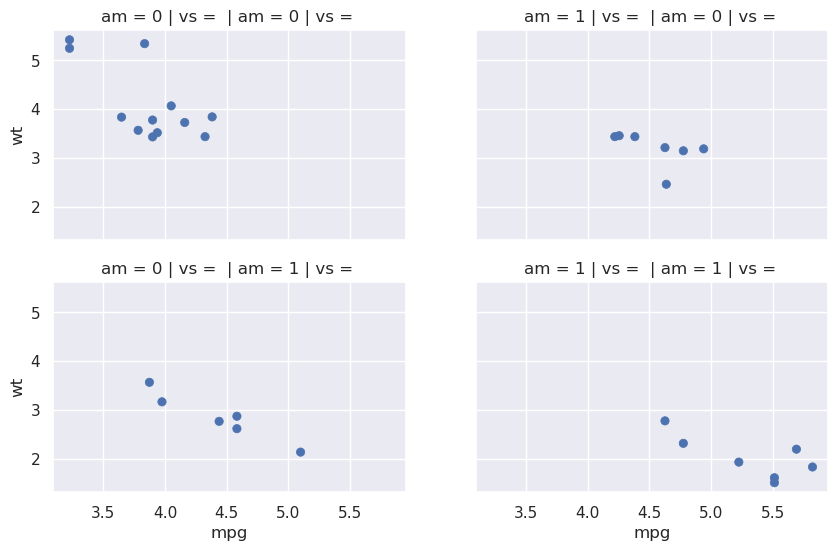

In [10]:
p = (
    so.Plot(data=mtcars, x="mpg", y="wt")
    .facet(col="vs", row="am")
    .add(so.Dot())
    .on(f := plt.figure(figsize=(10, 6)))
    .label(x="mpg", title="am = {} | vs = ".format)
).plot()


## Heatmap


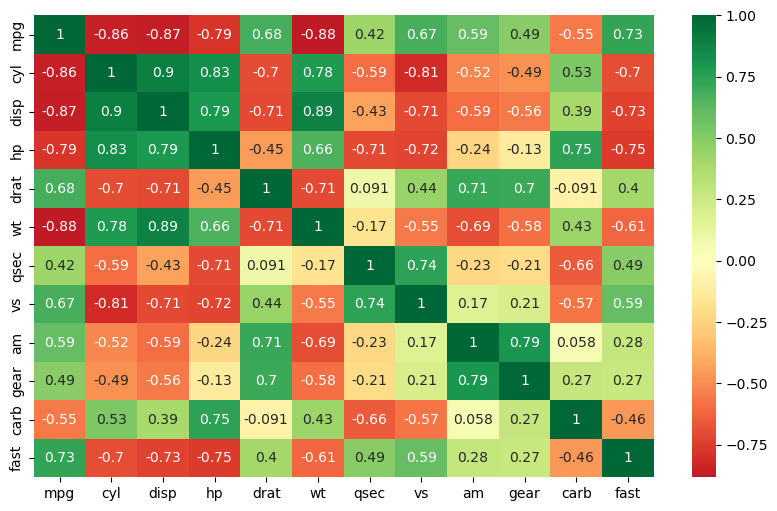

In [11]:
_, axes = plt.subplots(figsize=(10, 6))

sns.heatmap(
    mtcars.corr(numeric_only=True),
    xticklabels=mtcars.corr(numeric_only=True).columns,
    yticklabels=mtcars.corr(numeric_only=True).columns,
    cmap="RdYlGn",
    center=0,
    annot=True,
    ax=axes,
)

ax.set(title="Correlogram of mtcars")
plt.show()
